# **BDA Project - SchedWiz**

**Team Members:** *Varun Rao, Amit Gangane, Ruchira Lokhande, Garima Mathur, Priyanka Iyer*

# **EXPLORATORY DATA ANALYSIS**

**Importing all the libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from pyspark.sql import SparkSession
from pyspark.ml.feature import Imputer, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime
import builtins

**Loading the Datasets...**

In [2]:


student_info = pd.read_csv("studentInfo.csv")
student_assessment = pd.read_csv("studentAssessment.csv")
StudentVLE = pd.read_csv("studentVle.csv")
assessments = pd.read_csv("assessments.csv")

**1. Checking for null values**

In [3]:
student_info.isnull().sum()

,0
code_module,0
code_presentation,0
id_student,0
gender,0
region,0
highest_education,0
imd_band,0
age_band,0
num_of_prev_attempts,0
studied_credits,0


In [4]:
student_assessment.isnull().sum()

,0
id_assessment,0
id_student,0
date_submitted,0
is_banked,0
score,0


In [5]:
StudentVLE.isnull().sum()

,0
code_module,0
code_presentation,0
id_student,0
id_site,0
date,0
sum_click,0


In [6]:
assessments.isnull().sum()

,0
code_module,0
code_presentation,0
id_assessment,0
assessment_type,0
date,0
weight,0


**2. Summary statistics**

In [7]:
student_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [8]:
student_assessment.describe()

,id_assessment,id_student,date_submitted,is_banked
count,173912.000000,1.739120e+05,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977
std,8829.784254,5.523952e+05,71.484148,0.104194
min,1752.000000,6.516000e+03,-11.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000
max,37443.000000,2.698588e+06,608.000000,1.000000


In [9]:
StudentVLE.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [10]:
assessments.describe()

,id_assessment,weight
count,206.000000,206.000000
mean,26473.975728,20.873786
std,10098.625521,30.384224
min,1752.000000,0.000000
25%,15023.250000,0.000000
50%,25364.500000,12.500000
75%,34891.750000,24.250000
max,40088.000000,100.000000


**3. Demographic representations**

**a. Histogram results across different parameters**

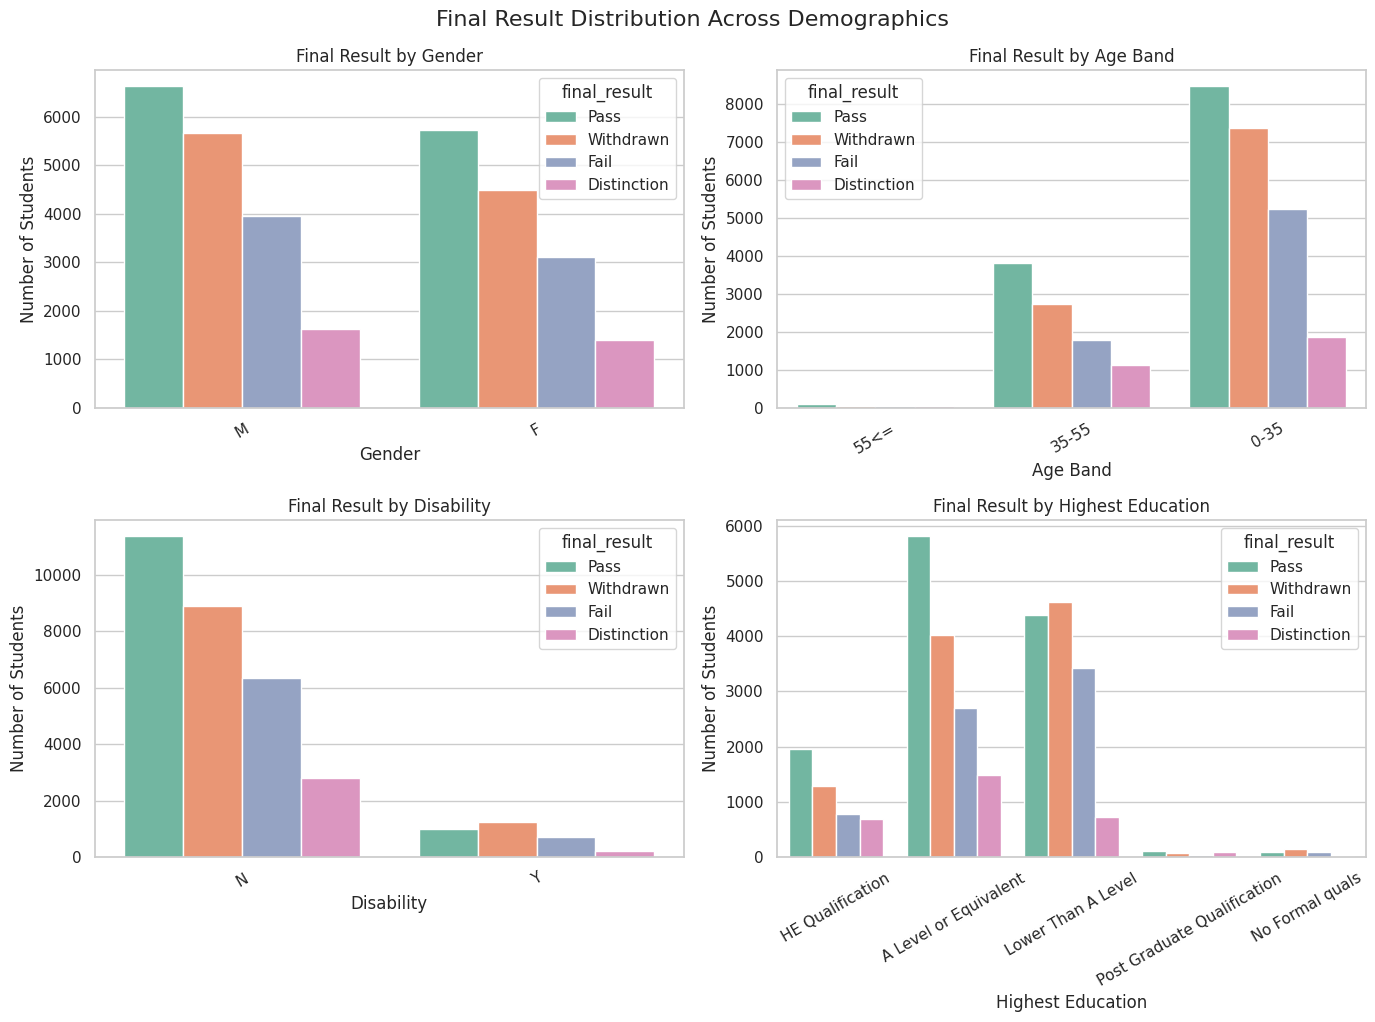

In [11]:
# Set plot style
sns.set(style="whitegrid")

# Define the demographic columns to analyze
demographic_cols = ['gender', 'age_band', 'disability', 'highest_education']

# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Create count plots
for idx, col in enumerate(demographic_cols):
    sns.countplot(data=student_info, x=col, hue='final_result', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f"Final Result by {col.replace('_', ' ').title()}")
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel("Number of Students")
    axes[idx].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.suptitle("Final Result Distribution Across Demographics", fontsize=16, y=1.02)
plt.show()


**b. Pie-chart distribution for pass/fail/distinction**

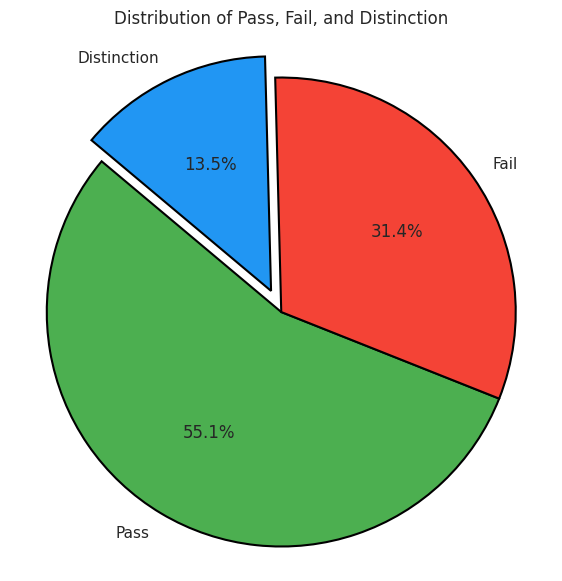

In [12]:
# Filter for specific final results
filtered_results = student_info[student_info['final_result'].isin(['Pass', 'Fail', 'Distinction'])]
result_counts = filtered_results['final_result'].value_counts()

# Define colors and explode settings
colors = ['#4CAF50', '#F44336', '#2196F3']  # Pass, Fail, Distinction
explode = [0, 0, 0.1]  # Explode Distinction

# Reorder explode and colors to match value_counts() order
explode_ordered = [explode[['Pass', 'Fail', 'Distinction'].index(label)] for label in result_counts.index]
colors_ordered = [colors[['Pass', 'Fail', 'Distinction'].index(label)] for label in result_counts.index]

# Plot
plt.figure(figsize=(7, 7))
plt.pie(result_counts,
        labels=result_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors_ordered,
        explode=explode_ordered,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})  # Add border
plt.title("Distribution of Pass, Fail, and Distinction")
plt.axis('equal')
plt.show()


**c. Correlation Heatmap - Categorical features vs Final Result**

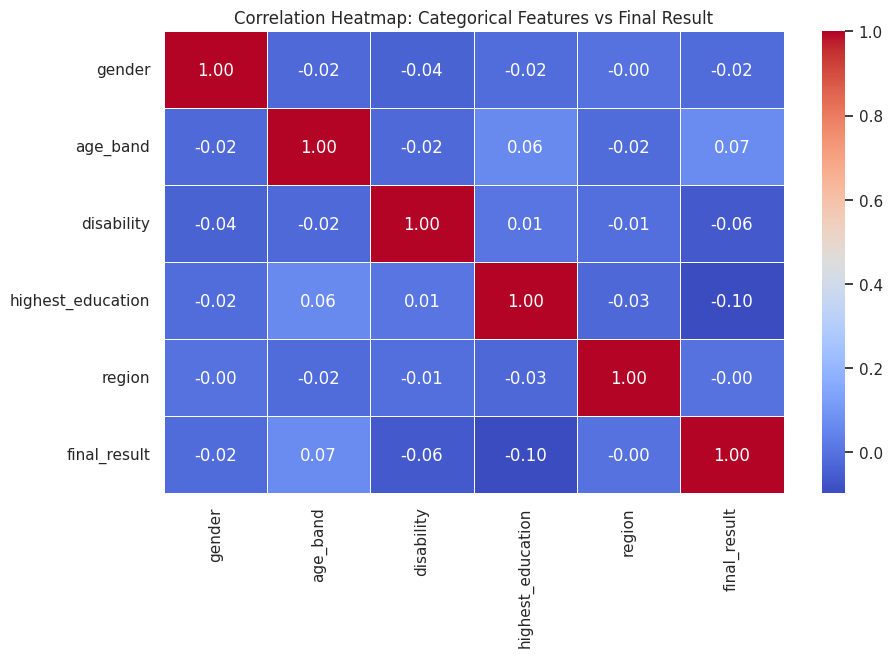

In [13]:
# Select relevant categorical features
cols = ['gender', 'age_band', 'disability', 'highest_education', 'region', 'final_result']
df = student_info[cols].copy()

# Map final_result to numeric for correlation (ordered)
final_result_map = {'Withdrawn': 0, 'Fail': 1, 'Pass': 2, 'Distinction': 3}
df['final_result'] = df['final_result'].map(final_result_map)

# Encode other categorical features using Ordinal Encoding
for col in ['gender', 'age_band', 'disability', 'highest_education', 'region']:
    df[col] = df[col].astype('category').cat.codes

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Categorical Features vs Final Result")
plt.show()


**d. Radar chart**

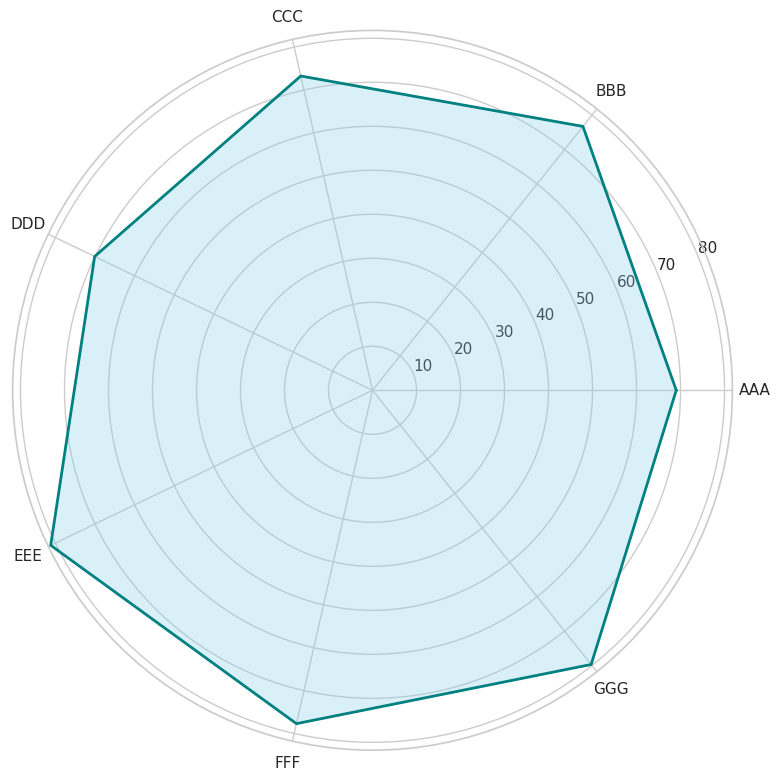

In [14]:
# Merge student_assessment with assessments to get 'code_module' and 'code_presentation'
student_assessment_merged = pd.merge(student_assessment, assessments[['id_assessment', 'code_module', 'code_presentation']],
                                     on='id_assessment',
                                     how='inner')

# Merge student_info with the merged assessment dataframe on the specified keys
merged_df = pd.merge(student_info, student_assessment_merged,
                     on=['id_student', 'code_module', 'code_presentation'],
                     how='inner')

# Convert 'score' to numeric, coercing errors, then drop NaNs
# This handles cases where 'score' might contain non-numeric strings
merged_df['score'] = pd.to_numeric(merged_df['score'], errors='coerce')
merged_df = merged_df.dropna(subset=['score'])

# Average score per subject code
avg_scores = merged_df.groupby('code_module')['score'].mean()

# Prepare data for radar chart
labels = avg_scores.index.tolist()
scores = avg_scores.values
num_vars = len(labels)

# Angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
scores = np.concatenate((scores, [scores[0]]))  # close the loop
angles += angles[:1]  # close the loop

# Plot radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, scores, linewidth=2, linestyle='solid', color='teal')
ax.fill(angles, scores, color='skyblue', alpha=0.3)

# Set axis labels
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.tight_layout()
plt.show()

# **MODELLING**

# Learner Agent

In [ ]:
# In this class we create a simple neural network that takes input,
# processes it through two hidden layers, and gives a final prediction.
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)


class LearnerAgent:
# This function sets up the basic settings for a model, like how to handle
# labels and store the model, pipeline, and input size.
    def __init__(self):
        self.model = None
        self.pipeline = None
        self.trained = False
        self.input_size = None
        self.label_mapping = {'Fail': 0, 'Pass': 1, 'Distinction': 2}
        self.inverse_label_mapping = {v: k for k, v in self.label_mapping.items()}

# This function prepares the data by cleaning, combining, and scaling features
# so that it can be used for training a machine learning model.
    def preprocess(self, spark_df, label_col):
        features = [col for col in spark_df.columns if col != label_col]
        assembler = VectorAssembler(inputCols=features, outputCol="features_vec")
        imputer = Imputer(inputCols=features, outputCols=features)
        scaler = StandardScaler(inputCol="features_vec", outputCol="features")
        self.pipeline = Pipeline(stages=[imputer, assembler, scaler])
        fitted_pipeline = self.pipeline.fit(spark_df)
        transformed = fitted_pipeline.transform(spark_df)
        self.input_size = len(features)
        return transformed.select("features", label_col)

# This function converts Spark DataFrame features and labels into PyTorch tensors
# for training a neural network.
    def to_tensor(self, df, label_col):
        X = np.array(df.select("features").rdd.map(lambda x: x[0].toArray()).collect())
        y = np.array(df.select(label_col).rdd.map(lambda x: self.label_mapping[x[0]]).collect())
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

# This function trains a simple neural network on the preprocessed Spark DataFrame
# using PyTorch for a given number of epochs and learning rate.
    def fit(self, spark_df, label_col, epochs=100, lr=0.001):
        df = self.preprocess(spark_df, label_col)
        X, y = self.to_tensor(df, label_col)

        self.model = SimpleNN(self.input_size, len(self.label_mapping))
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            optimizer.zero_grad()
            output = self.model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
        self.trained = True

# This function uses the trained neural network to make predictions on new data
# and returns the results as readable class labels.
    def predict(self, spark_df):
        if not self.trained:
            raise Exception("LearnerAgent not trained yet.")
        df = self.pipeline.transform(spark_df)
        X = np.array(df.select("features").rdd.map(lambda x: x[0].toArray()).collect())
        X_tensor = torch.tensor(X, dtype=torch.float32)
        logits = self.model(X_tensor)
        preds = torch.argmax(logits, axis=1).numpy()
        return [self.inverse_label_mapping[p] for p in preds]

# In this function we will check how well the model is performing by comparing
# its predictions with actual labels and print the accuracy and
# a detailed classification report.
    def evaluate(self, spark_df, label_col):
        y_true = np.array(spark_df.select(label_col).rdd.map(lambda x: self.label_mapping[x[0]]).collect())
        y_pred = self.predict(spark_df)
        y_pred_num = [self.label_mapping[p] for p in y_pred]
        print("Accuracy:", round(accuracy_score(y_true, y_pred_num) * 100, 2), "%")
        print(classification_report(y_true, y_pred_num, target_names=['Fail', 'Pass', 'Distinction']))

# This function takes subject feature data, makes predictions using the trained model,
# and return a dictionary of predicted scores for each subject.
    def predict_subject_scores(self, subject_feature_dict):
        pdf = pd.DataFrame.from_dict(subject_feature_dict, orient='index')
        spark_df = SparkSession.builder.getOrCreate().createDataFrame(pdf.reset_index(drop=True))
        return dict(zip(subject_feature_dict.keys(), self.predict(spark_df)))


# Model using PySpark and Neural Network, Adam optimizer, ReLU and Linear

In [ ]:
# We initialize Spark session here
spark = SparkSession.builder.appName("StudentPerformanceNN").getOrCreate()

# Data Preparation
# Here we load and merge student, assessment, and VLE datasets to prepare the
# data for further processing or model training.
def prepare_student_dataset():
    info = pd.read_csv("studentInfo.csv")
    assessment = pd.read_csv("studentAssessment.csv")
    assessments_meta = pd.read_csv("assessments.csv")
    student_vle = pd.read_csv("studentVle.csv")

    assessment['score'] = pd.to_numeric(assessment['score'], errors='coerce')
    assessment = assessment.merge(
        assessments_meta[['id_assessment', 'code_module', 'code_presentation', 'date', 'weight', 'assessment_type']],
        on='id_assessment'
    )

# This function performs feature engineering by aggregating assessment and VLE data,
# merging it with student demographics, and generating a clean dataset (merged),
# a list of features, and average feature templates (subject_feature_templates)
# for each subject code.
    def safe_weighted_avg(x):
        weights = assessment.loc[x.index, 'weight']
        if weights.isnull().all() or weights.sum() == 0:
            return x.mean()
        return np.average(x.fillna(0), weights=weights.fillna(0))

    agg_scores = assessment.groupby(['id_student', 'code_module']).agg(
        avg_score=('score', 'mean'),
        std_score=('score', 'std'),
        count=('score', 'count'),
        last_score=('score', lambda x: x.iloc[-1]),
        weighted_score=('score', safe_weighted_avg)
    ).reset_index()

    assessment_sorted = assessment.sort_values(['id_student', 'date'])
    score_trend = assessment_sorted.groupby('id_student')['score'].apply(
        lambda x: np.polyfit(range(len(x)), x.fillna(0), 1)[0] if len(x) > 1 else 0
    ).reset_index(name='score_trend')

    vle_features = student_vle.groupby('id_student').agg(
        total_clicks=('sum_click', 'sum'),
        active_days=('date', 'nunique'),
        avg_clicks_per_day=('sum_click', lambda x: x.sum() / max(1, len(x))),
        click_variability=('sum_click', 'std')
    ).reset_index()

    first_14 = student_vle[student_vle['date'] <= 14].groupby('id_student')['sum_click'].sum().reset_index(name='clicks_first_14_days')
    last_7 = student_vle[student_vle['date'] >= student_vle['date'].max() - 7].groupby('id_student')['sum_click'].sum().reset_index(name='clicks_last_7_days')

    info_filtered = info[['id_student', 'code_module', 'final_result', 'age_band', 'highest_education', 'imd_band']]
    encoder = OrdinalEncoder()
    info_filtered[['age_band', 'highest_education', 'imd_band']] = encoder.fit_transform(
        info_filtered[['age_band', 'highest_education', 'imd_band']].astype(str)
    )

    merged = agg_scores.merge(info_filtered, on=['id_student', 'code_module'], how='left')
    merged = merged.merge(vle_features, on='id_student', how='left')
    merged = merged.merge(score_trend, on='id_student', how='left')
    merged = merged.merge(first_14, on='id_student', how='left')
    merged = merged.merge(last_7, on='id_student', how='left')

    merged = merged[merged['final_result'] != 'Withdrawn']
    merged = merged[merged['count'] >= 2]
    merged = merged[merged['total_clicks'] > 0]

    label_map = {'Fail': 0, 'Pass': 1, 'Distinction': 2}
    merged['target_class'] = merged['final_result'].map(label_map)

    merged['score_click_interaction'] = merged['avg_score'] * merged['total_clicks']
    merged['click_std_ratio'] = merged['click_variability'] / (merged['avg_clicks_per_day'] + 1e-3)

    features = ['avg_score', 'std_score', 'count', 'last_score', 'score_trend', 'weighted_score',
                'total_clicks', 'active_days', 'avg_clicks_per_day', 'click_variability',
                'clicks_first_14_days', 'clicks_last_7_days',
                'age_band', 'highest_education', 'imd_band',
                'score_click_interaction', 'click_std_ratio']

    subject_feature_templates = {}
    for subject in merged['code_module'].unique():
        subject_df = merged[merged['code_module'] == subject]
        subject_avg = subject_df[features].mean().to_dict()
        subject_feature_templates[subject] = subject_avg

    return merged, features, subject_feature_templates

# Run Data Prep
merged, features, subject_feature_templates = prepare_student_dataset()

# Convert to Spark DataFrame
merged = merged.dropna(subset=['target_class'])  # while dropping missing labels
spark_df = spark.createDataFrame(merged)

# PySpark Feature Pipeline
imputer = Imputer(inputCols=features, outputCols=features)
assembler = VectorAssembler(inputCols=features, outputCol="features_vec")
scaler = StandardScaler(inputCol="features_vec", outputCol="features")
pipeline = Pipeline(stages=[imputer, assembler, scaler])
fitted_pipeline = pipeline.fit(spark_df)
final_df = fitted_pipeline.transform(spark_df).select("features", "target_class")

# We convert to Tensors
X_np = np.array(final_df.select("features").rdd.map(lambda x: x[0].toArray()).collect())
y_np = np.array(final_df.select("target_class").rdd.map(lambda x: int(x[0])).collect())
X_tensor = torch.tensor(X_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.long)
train_size = int(0.8 * len(X_tensor))
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

#PyTorch Model

# In this class we define a simple feedforward neural network (MLP) with two
# hidden layers, while setting up the model with the input size and number of classes,
# and initializes the optimizer and loss function for training a classification task.

class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

model = MLP(X_train.shape[1], len(set(y_np)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training the Model
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the Model
model.eval()

with torch.no_grad():
    # Train accuracy
    train_logits = model(X_train)
    train_preds = torch.argmax(train_logits, axis=1)
    train_accuracy = round(accuracy_score(y_train.numpy(), train_preds.numpy()) * 100, 2)

    # Test accuracy
    test_logits = model(X_test)
    test_preds = torch.argmax(test_logits, axis=1)
    test_accuracy = round(accuracy_score(y_test.numpy(), test_preds.numpy()) * 100, 2)

# Result printing
print(f"\nTrain Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")
print("\n Test Set Classification Report:")
print(classification_report(y_test.numpy(), test_preds.numpy(), target_names=['Fail', 'Pass', 'Distinction']))


<ipython-input-2-9a884271182a>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_filtered[['age_band', 'highest_education', 'imd_band']] = encoder.fit_transform(



Train Accuracy: 74.98%
Test Accuracy: 73.3%

 Test Set Classification Report:
              precision    recall  f1-score   support

        Fail       0.71      0.65      0.68       807
        Pass       0.74      0.89      0.81      2475
 Distinction       0.75      0.32      0.45       756

    accuracy                           0.73      4038
   macro avg       0.73      0.62      0.64      4038
weighted avg       0.73      0.73      0.71      4038



# Scheduler Agent

In [ ]:
class SchedulerAgent:

# This function stores the predicted class for each subject, the exam dates,
# and the total study hours available per day.

      # predicted_scores (dict): Subject → predicted class (0 = Fail, 1 = Pass, 2 = Distinction)
    def __init__(self, predicted_scores, exam_dates, total_daily_hours):
        self.predicted_scores = {subj: int(score[0]) if isinstance(score, (np.ndarray, list)) else int(score)
                                 for subj, score in predicted_scores.items()}
        self.exam_dates = exam_dates
        self.total_daily_hours = total_daily_hours

# assigns a priority score to each subject by giving higher priority to subjects
# with lower predicted performance (e.g., Fail gets higher priority than Distinction).
    def _calculate_priority_scores(self):
        max_score = max(self.predicted_scores.values(), default=2)
        return {subj: (max_score - score + 1) for subj, score in self.predicted_scores.items()}

# function calculates how many days are left until each exam, ensuring that the
# minimum is at least 1 day.
    def _calculate_days_until_exam(self):
        today = datetime.today().date()
        return {
            subj: max(1, (datetime.strptime(date, "%Y-%m-%d").date() - today).days)
            for subj, date in self.exam_dates.items()
        }

# we allocates total study hours to each subject by distributing the available
# hours based on priority and days left until the exam, ensuring subjects with
# higher priority and more urgent exams get more time.
    def _compute_total_hours(self, priority_scores, days_left):
        total_priority = builtins.sum(priority_scores.values())
        return {subj: round((priority_scores[subj] / total_priority) * self.total_daily_hours * days_left[subj], 2)
                for subj in priority_scores} if total_priority else {subj: 0 for subj in priority_scores}

# in this function we will generate a study schedule as a DataFrame by
# calculating days left until each exam and allocate total study hours per
# subject based on priority.
    def run(self):
        priority_scores = self._calculate_priority_scores()
        days_left = self._calculate_days_until_exam()
        allocated_hours = self._compute_total_hours(priority_scores, days_left)

        return pd.DataFrame({
            "Subject": list(self.predicted_scores.keys()),
            "Days Until Exam": [days_left[s] for s in self.predicted_scores],
            "Total Hours Assigned": [allocated_hours[s] for s in self.predicted_scores]
        }).sort_values(by="Total Hours Assigned", ascending=False).reset_index(drop=True)


# In this we take the user input for subjects, their exam dates, and latest assessment scores,
# then customizes feature data for prediction and returns all necessary inputs for the scheduling process.
def get_user_inputs(subject_templates):
    subject_feature_dict, exam_dates = {}, {}
    print("\n Available subjects:", ", ".join(subject_templates.keys()))
    n = int(input("How many subjects do you want to schedule for? "))

    for _ in range(n):
        code = input("Enter subject code (e.g., AAA): ").upper()
        if code not in subject_templates:
            print(f" Invalid code: {code}")
            continue

        date = input(f"Enter exam date for {code} (YYYY-MM-DD): ")
        latest_score = float(input(f"Enter latest assessment mark for {code}: "))

        features = subject_templates[code].copy()
        features['avg_score'] = latest_score
        features['last_score'] = latest_score
        features['weighted_score'] = latest_score

        subject_feature_dict[code] = features
        exam_dates[code] = date

    daily_hours = int(input("Enter number of hours you can study daily: "))
    return subject_feature_dict, exam_dates, daily_hours

# This function predicts the class label for each subject using a PyTorch model
# and a Spark preprocessing pipeline.
def predict_subject_scores_pytorch(model, pipeline_model, subject_feature_dict):
    predictions = {}
    for subj_code, features in subject_feature_dict.items():
        pdf = pd.DataFrame([features])
        sdf = SparkSession.builder.getOrCreate().createDataFrame(pdf)
        transformed = pipeline_model.transform(sdf).select("features")
        features_np = np.array(transformed.rdd.map(lambda x: x[0].toArray()).collect())
        features_tensor = torch.tensor(features_np, dtype=torch.float32)
        with torch.no_grad():
            logits = model(features_tensor)
            pred = torch.argmax(logits, axis=1).item()
        predictions[subj_code] = pred
    return predictions

# THis is the interactive scheduler where we create a subject map for matching
# the subject code woith the subject name.
try:
    subject_inputs, exam_dates, total_daily_hours = get_user_inputs(subject_feature_templates)
    predicted_scores = predict_subject_scores_pytorch(model, fitted_pipeline, subject_inputs)
    scheduler = SchedulerAgent(predicted_scores, exam_dates, total_daily_hours)
    schedule_df = scheduler.run()

    subject_map = {'AAA': 'Social Sciences', 'BBB': 'Business Analytics', 'CCC': 'Computer Science',
                   'DDD': 'Political Science / Anthropology / Environmental Studies',
                   'EEE': 'Engineering / Applied Physics', 'FFF': 'Mathematics / Statistics / Computer Science',
                   'GGG': 'Humanities'}
    schedule_df['Subject'] = schedule_df['Subject'].map(subject_map).fillna(schedule_df['Subject'])

    print("\n Personalized Study Schedule:")
    print(schedule_df)

except Exception as e:
    print(f"❗ Error: {e}")



 Available subjects: AAA, BBB, CCC, GGG, DDD, EEE, FFF
How many subjects do you want to schedule for? 2
Enter subject code (e.g., AAA): EEE
Enter exam date for EEE (YYYY-MM-DD): 2025-06-01
Enter latest assessment mark for EEE: 50
Enter subject code (e.g., AAA): GGG
Enter exam date for GGG (YYYY-MM-DD): 2025-06-03
Enter latest assessment mark for GGG: 80
Enter number of hours you can study daily: 4

 Personalized Study Schedule:
                         Subject  Days Until Exam  Total Hours Assigned
0                     Humanities                4                   8.0
1  Engineering / Applied Physics                2                   4.0
